# Data Preprocessing and get one on data

## Get the data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-07-12 14:21:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  71.2MB/s    in 1.5s    

2022-07-12 14:21:14 (71.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it) visualize visualize !

In [2]:
!ls pizza_steak

test/  train/


In [3]:
!ls pizza_steak/train/

pizza/ steak/


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg   618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg   61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  168

In [3]:
import os
for dirpath,dirnames,filename in os.walk('./pizza_steak/'):
    print(f"There are {len(dirnames)} and {len(filename)} in {dirpath}")

There are 2 and 1 in ./pizza_steak/
There are 2 and 1 in ./pizza_steak/test
There are 0 and 250 in ./pizza_steak/test/steak
There are 0 and 250 in ./pizza_steak/test/pizza
There are 2 and 1 in ./pizza_steak/train
There are 0 and 750 in ./pizza_steak/train/steak
There are 0 and 750 in ./pizza_steak/train/pizza


## Get the class names

In [4]:
import numpy as np
import pathlib

data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

## visualize our imgs

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_img(target_dir,target_class):
    # form the right path
    path = pathlib.Path(f'pizza_steak/{target_dir}/{target_class}')
    dirlist = os.listdir(path)

    # draw a ramdom index number of the dirlist (formed an arry of imgs)
    lucky_index = random.randint(0,len(dirlist))
    lucky_img = dirlist[lucky_index]


    img = mpimg.imread(f'pizza_steak/{target_dir}/{target_class}/{lucky_img}')
    plt.imshow(img)
    plt.title(f'{target_class} \n Img file name:{lucky_img}')
    plt.axis("off")
    print(f'Img shape {img.shape}')
    return img

Img shape (287, 512, 3)


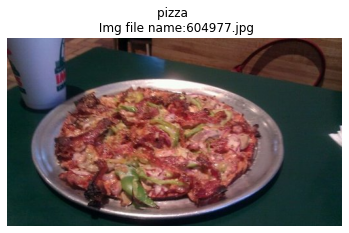

In [8]:
img = view_random_img('train','pizza')

In [9]:
img.shape # returns width height color channels

(287, 512, 3)

# End to end example

follow this cnn explaniner https://poloclub.github.io/cnn-explainer/

In [59]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocessing data make all the pixel between 1 to 0
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup path to our data dir
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from dir turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

# build a CNN model
model_1 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [60]:
imgs, labels = train_data.next()
len(imgs), len(labels)

(32, 32)

In [63]:
imgs[0].shape

(224, 224, 3)

why creating batches ? <br>
Since our computer can not handle all the things into one batch <br>
Also it is due to we dont have larger GPU memory size to Fit

In [41]:
len(train_data) # there are 47 batches 

47

In [42]:
1500 / 32 # 32 is the batch size of a batch that computer will look throught 32 pictures

46.875

In [45]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
hist_1 = model_1.fit(train_data,epochs=10, steps_per_epoch=len(train_data),validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/10


2022-07-12 15:44:31.071284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1144/1500 [=====================>........] - ETA: 5s - loss: 0.6364 - accuracy: 0.6512

KeyboardInterrupt: 

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Lets check the pervious saved model is working on this dataset <b>( experiment )<b>
the model is building in the tensorflow playground <a>https://playground.tensorflow.org<a>

In [23]:
tf.random.set_seed(42)
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'] )
model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data),validation_data=valid_data , validation_steps=len(valid_data))

Epoch 1/5


2022-07-12 14:54:24.026745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6340 - accuracy: 0.6780

2022-07-12 14:54:27.729279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 101ms/step - loss: 0.6340 - accuracy: 0.6780 - val_loss: 0.6127 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 4s 85ms/step - loss: 0.6086 - accuracy: 0.7420 - val_loss: 0.5856 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 4s 86ms/step - loss: 0.5931 - accuracy: 0.7613 - val_loss: 0.5858 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 4s 83ms/step - loss: 0.5871 - accuracy: 0.7620 - val_loss: 0.5633 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 4s 83ms/step - loss: 0.5657 - accuracy: 0.7720 - val_loss: 0.5707 - val_accuracy: 0.7840


In [22]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_21 (Dense)            (None, 128)               19267712  
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 1)                 129       
                                                                 
Total params: 19,300,865
Trainable params: 19,300,865
Non-trainable params: 0
_________________________________________________________________


In [24]:
len(train_data) + len(valid_data)

63

## Try to increase the nerons

In [31]:
tf.random.set_seed(42)
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_3.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'] )
model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data),validation_data=valid_data , validation_steps=len(valid_data))

Epoch 1/5


2022-07-12 14:57:57.752786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 7.4275 - accuracy: 0.6093

2022-07-12 14:58:01.779656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 109ms/step - loss: 7.4275 - accuracy: 0.6093 - val_loss: 1.2628 - val_accuracy: 0.5240
Epoch 2/5
47/47 [==============================] - 5s 99ms/step - loss: 1.1018 - accuracy: 0.6800 - val_loss: 2.6067 - val_accuracy: 0.5740
Epoch 3/5
47/47 [==============================] - 5s 99ms/step - loss: 0.7737 - accuracy: 0.7113 - val_loss: 0.5373 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 5s 99ms/step - loss: 0.4977 - accuracy: 0.7887 - val_loss: 0.4974 - val_accuracy: 0.7280
Epoch 5/5
47/47 [==============================] - 5s 98ms/step - loss: 0.5034 - accuracy: 0.7667 - val_loss: 0.4454 - val_accuracy: 0.7960


In [34]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 150528)            0         
                                                                 
 dense_37 (Dense)            (None, 300)               45158700  
                                                                 
 dense_38 (Dense)            (None, 300)               90300     
                                                                 
 dense_39 (Dense)            (None, 300)               90300     
                                                                 
 dense_40 (Dense)            (None, 1)                 301       
                                                                 
Total params: 45,339,601
Trainable params: 45,339,601
Non-trainable params: 0
_________________________________________________________________


In [35]:
45339601 /31101

1457.8181087424841

# Building a CNN model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


model_4 = Sequential([
    Conv2D(10,2, input_shape=(224,224,3), activation='relu',strides=1,padding="valid"),
    Conv2D(10,2, activation='relu'),
    Conv2D(10,2, activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_4.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=["accuracy"])
hist4 = model_4.fit(train_data,epochs=10,steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-13 00:47:41.253119: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-13 00:47:41.253431: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


NameError: name 'valid_data' is not defined

In [76]:
model_4.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 223, 223, 10)      130       
                                                                 
 conv2d_53 (Conv2D)          (None, 222, 222, 10)      410       
                                                                 
 conv2d_54 (Conv2D)          (None, 221, 221, 10)      410       
                                                                 
 flatten_23 (Flatten)        (None, 488410)            0         
                                                                 
 dense_54 (Dense)            (None, 1)                 488411    
                                                                 
Total params: 489,361
Trainable params: 489,361
Non-trainable params: 0
_________________________________________________________________


# Evaluate our model

<AxesSubplot:>

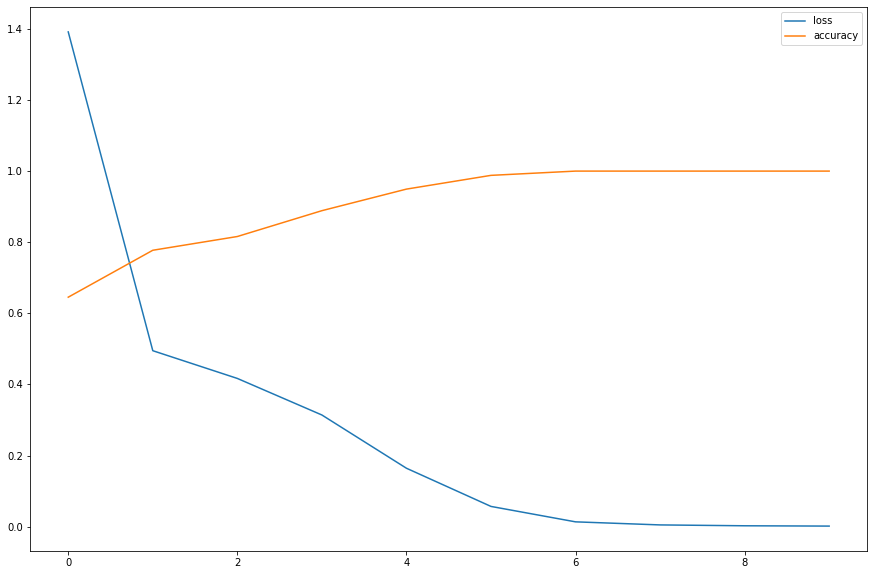

In [84]:
import pandas as pd
pd.DataFrame(hist4.history,columns=['loss','accuracy']).plot(figsize=(15,10))

<AxesSubplot:>

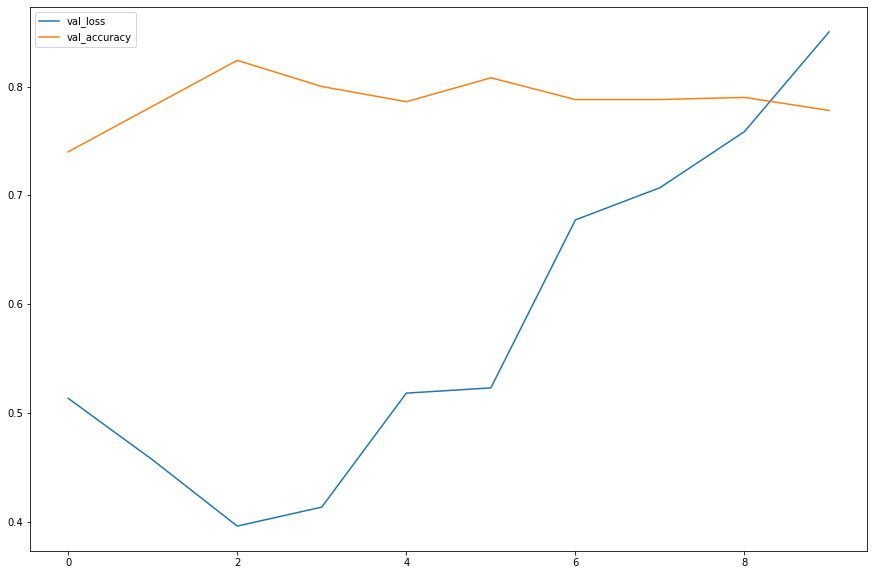

In [86]:
pd.DataFrame(hist4.history,columns=['val_loss','val_accuracy']).plot(figsize=(15,10))

In [22]:
def plot_loss_curves(hist):
    loss = hist.history["loss"]
    val_loss = hist.history["val_loss"]

    accuracy = hist.history["accuracy"]
    val_accuracy = hist.history["val_accuracy"]

    epochs = range(len(hist.history["loss"]))

    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs,accuracy,label="accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

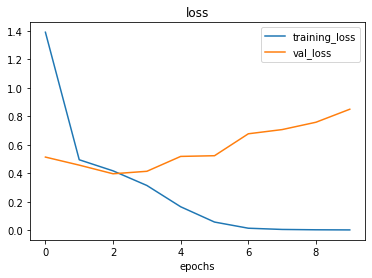

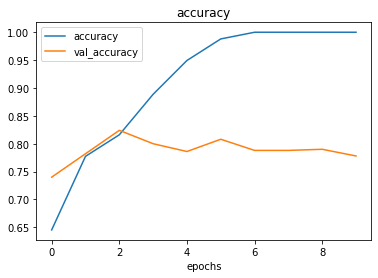

In [103]:
plot_loss_curves(hist4)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

# Deal with overfitting

In [107]:

model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_5.compile(loss=BinaryCrossentropy(),optimizer=Adam() ,metrics=['accuracy'])

model_5.fit(train_data,epochs=30,steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/30


2022-07-12 17:07:35.040229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6498 - accuracy: 0.6087

2022-07-12 17:07:39.442794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 6s 107ms/step - loss: 0.6498 - accuracy: 0.6087 - val_loss: 0.5547 - val_accuracy: 0.7520
Epoch 2/30
47/47 [==============================] - 4s 87ms/step - loss: 0.5403 - accuracy: 0.7327 - val_loss: 0.5408 - val_accuracy: 0.7020
Epoch 3/30
47/47 [==============================] - 4s 87ms/step - loss: 0.4831 - accuracy: 0.7767 - val_loss: 0.3971 - val_accuracy: 0.8220
Epoch 4/30
47/47 [==============================] - 4s 89ms/step - loss: 0.4318 - accuracy: 0.8033 - val_loss: 0.3782 - val_accuracy: 0.8300
Epoch 5/30
47/47 [==============================] - 4s 87ms/step - loss: 0.4183 - accuracy: 0.8100 - val_loss: 0.3405 - val_accuracy: 0.8460
Epoch 6/30
47/47 [==============================] - 4s 87ms/step - loss: 0.3905 - accuracy: 0.8347 - val_loss: 0.3337 - val_accuracy: 0.8560
Epoch 7/30
47/47 [==============================] - 4s 87ms/step - loss: 0.3714 - accuracy: 0.8393 - val_loss: 0.3361 - val_accuracy: 0.8600
Epoch 8/30
47/47 [=====

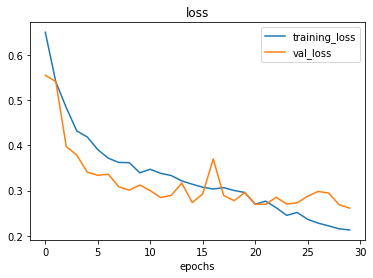

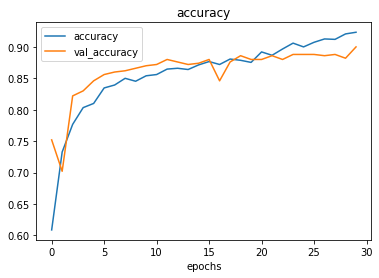

In [109]:
plot_loss_curves(model_5.history)

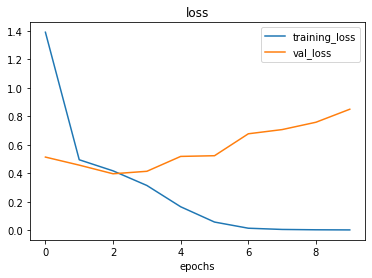

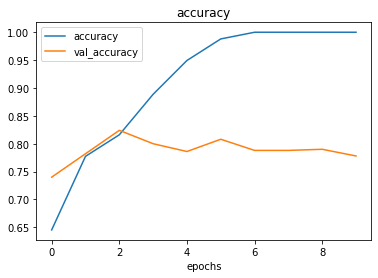

In [116]:
plot_loss_curves(hist4)

## Data augmentation

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    shear_range=.2,
    zoom_range=.2,
    width_shift_range=.2,
    height_shift_range=.3,
    horizontal_flip=True
)
# without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


Then What the fuck is that ?? 


Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjuting the rotation of an image, flipping it, cropping it or something similar.


Let's write some code to visualize data augmentation...

In [30]:
# import trainning and testing dir 
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224), batch_size=32, class_mode="binary",shuffle=False) # dun turn of the shuffle (demo purpose)
test_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224), batch_size=32, class_mode="binary",shuffle=False) # dun turn of the shuffle (demo purpose)
train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224), batch_size=32, class_mode="binary",shuffle=True)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


Text(0.5, 1.0, 'augmented')

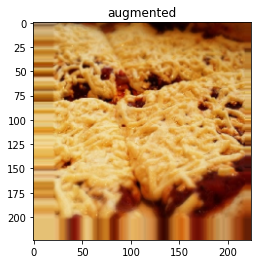

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_data_augmented.next()[0][1])
plt.title('augmented')

Text(0.5, 1.0, 'augmented')

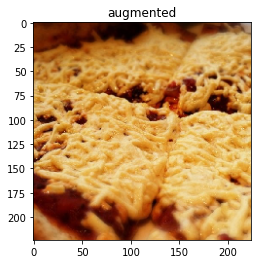

In [11]:
plt.imshow(train_data.next()[0][1])
plt.title('augmented')

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [36]:
model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(1, activation="sigmoid")
])
model_6.compile(loss=BinaryCrossentropy(),optimizer=Adam() ,metrics=['accuracy'])

model_6.fit(train_data_augmented,epochs=25,steps_per_epoch=len(train_data_augmented), validation_data=test_data_augmented, validation_steps=len(test_data_augmented))

Epoch 1/25


2022-07-13 01:12:34.473104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.7194 - accuracy: 0.5033

2022-07-13 01:12:43.838178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 19s 388ms/step - loss: 0.7194 - accuracy: 0.5033 - val_loss: 0.6908 - val_accuracy: 0.5427
Epoch 2/25
47/47 [==============================] - 18s 384ms/step - loss: 0.6921 - accuracy: 0.5247 - val_loss: 0.6857 - val_accuracy: 0.6840
Epoch 3/25
47/47 [==============================] - 18s 386ms/step - loss: 0.6855 - accuracy: 0.6027 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/25
47/47 [==============================] - 18s 390ms/step - loss: 0.6892 - accuracy: 0.6007 - val_loss: 0.6758 - val_accuracy: 0.6733
Epoch 5/25
47/47 [==============================] - 18s 388ms/step - loss: 0.6762 - accuracy: 0.6020 - val_loss: 0.6675 - val_accuracy: 0.5793
Epoch 6/25
47/47 [==============================] - 18s 382ms/step - loss: 0.6555 - accuracy: 0.6327 - val_loss: 0.6488 - val_accuracy: 0.5980
Epoch 7/25
47/47 [==============================] - 18s 381ms/step - loss: 0.6516 - accuracy: 0.6320 - val_loss: 0.6143 - val_accuracy: 0.7180
Epoch 8/25

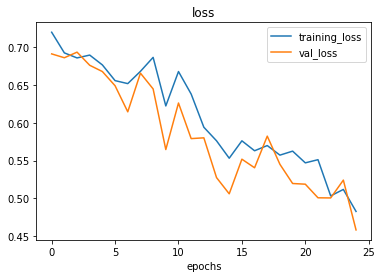

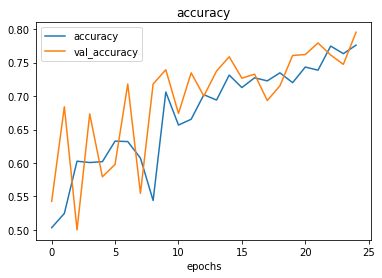

In [39]:
plot_loss_curves(model_6.history)

In [35]:
train_data_augmented_with_shuffle = train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224), class_mode="binary",shuffle=True,batch_size=32)
test_augmented_with_shuffle = train_datagen_augmented.flow_from_directory(test_dir,target_size=(224,224), class_mode="binary",shuffle=True,batch_size=32)

model_7_with_shuffle = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(1, activation="sigmoid")
])
model_7_with_shuffle.compile(loss=BinaryCrossentropy(),optimizer=Adam() ,metrics=['accuracy'])

model_7_with_shuffle.fit(train_data_augmented_with_shuffle,epochs=25,steps_per_epoch=len(train_data_augmented_with_shuffle), validation_data=test_augmented_with_shuffle, validation_steps=len(test_augmented_with_shuffle))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/25


2022-07-13 01:07:28.646488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6744 - accuracy: 0.6000

2022-07-13 01:07:38.369353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 13s 270ms/step - loss: 0.6744 - accuracy: 0.6000 - val_loss: 0.6013 - val_accuracy: 0.7040
Epoch 2/25
47/47 [==============================] - 13s 270ms/step - loss: 0.5873 - accuracy: 0.7120 - val_loss: 0.5331 - val_accuracy: 0.7700
Epoch 3/25
47/47 [==============================] - 12s 265ms/step - loss: 0.5480 - accuracy: 0.7440 - val_loss: 0.4717 - val_accuracy: 0.8020
Epoch 4/25
47/47 [==============================] - 12s 261ms/step - loss: 0.5515 - accuracy: 0.7353 - val_loss: 0.4918 - val_accuracy: 0.7860
Epoch 5/25
47/47 [==============================] - 12s 265ms/step - loss: 0.5020 - accuracy: 0.7680 - val_loss: 0.4505 - val_accuracy: 0.7800
Epoch 6/25
47/47 [==============================] - 12s 264ms/step - loss: 0.4858 - accuracy: 0.7840 - val_loss: 0.4349 - val_accuracy: 0.8200
Epoch 7/25
47/47 [==============================] - 12s 262ms/step - loss: 0.4945 - accuracy: 0.7700 - val_loss: 0.4166 - val_accuracy: 0.8240
Epoch 8/25

why it is slower than without data augmented ?<br>
It is because it is augmenting when traning is start and it is not preprocessed before the model start to train 

## The Power of shuffle

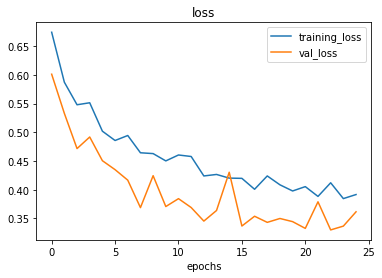

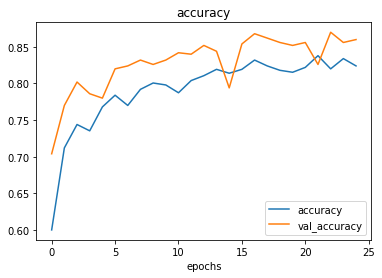

In [44]:
plot_loss_curves(model_7_with_shuffle.history)

# Practicing 

In [61]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten


model_8_vgg16 = Sequential([
    Conv2D(10,3,input_shape=(224, 224, 3),activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Flatten(),
    Dense(1,activation='sigmoid'),
])

model_8_vgg16.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=["accuracy"])

model_8_vgg16.fit(
    train_data_augmented_with_shuffle,
    epochs=20,
    steps_per_epoch=len(train_data_augmented_with_shuffle),
    validation_data=test_augmented_with_shuffle,
    validation_steps=len(test_augmented_with_shuffle),
)


Epoch 1/20


2022-07-13 12:40:46.271501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6911 - accuracy: 0.5007

2022-07-13 12:40:56.501506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 14s 272ms/step - loss: 0.6911 - accuracy: 0.5007 - val_loss: 0.6776 - val_accuracy: 0.5060
Epoch 2/20
47/47 [==============================] - 12s 258ms/step - loss: 0.6245 - accuracy: 0.6660 - val_loss: 0.5575 - val_accuracy: 0.7360
Epoch 3/20
47/47 [==============================] - 12s 258ms/step - loss: 0.5762 - accuracy: 0.7033 - val_loss: 0.4939 - val_accuracy: 0.7560
Epoch 4/20
47/47 [==============================] - 12s 259ms/step - loss: 0.5636 - accuracy: 0.7107 - val_loss: 0.5300 - val_accuracy: 0.7540
Epoch 5/20
47/47 [==============================] - 12s 258ms/step - loss: 0.5428 - accuracy: 0.7420 - val_loss: 0.4836 - val_accuracy: 0.7680
Epoch 6/20
47/47 [==============================] - 12s 258ms/step - loss: 0.5193 - accuracy: 0.7593 - val_loss: 0.4729 - val_accuracy: 0.8000
Epoch 7/20
47/47 [==============================] - 12s 258ms/step - loss: 0.5236 - accuracy: 0.7473 - val_loss: 0.4800 - val_accuracy: 0.8060
Epoch 8/20

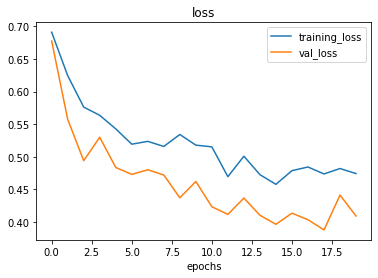

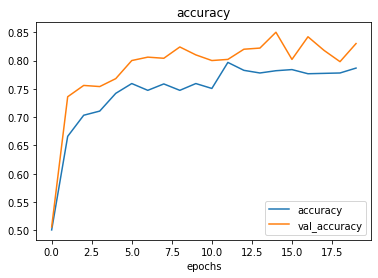

In [63]:
plot_loss_curves(model_8_vgg16.history)

In [60]:
model_9_vgg16 = Sequential([
    Conv2D(32,3,input_shape=(224, 224, 3),activation='relu'),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(32,3,activation='relu'),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(32,3,activation='relu'),
    Conv2D(32,3,activation='relu'),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(32,3,activation='relu'),
    Conv2D(32,3,activation='relu'),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(32,3,activation='relu'),
    Conv2D(32,3,activation='relu'),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Flatten(),
    Dense(1,activation='sigmoid'),
])

model_9_vgg16.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=["accuracy"])

model_9_vgg16.fit(
    train_data_augmented_with_shuffle,
    epochs=20,
    steps_per_epoch=len(train_data_augmented_with_shuffle),
    validation_data=test_augmented_with_shuffle,
    validation_steps=len(test_augmented_with_shuffle),
)

Epoch 1/20


2022-07-13 12:36:27.969282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6960 - accuracy: 0.4867

2022-07-13 12:36:40.110189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 16s 290ms/step - loss: 0.6960 - accuracy: 0.4867 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 2/20
47/47 [==============================] - 13s 278ms/step - loss: 0.6892 - accuracy: 0.5233 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/20
47/47 [==============================] - 13s 277ms/step - loss: 0.6708 - accuracy: 0.5873 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 4/20
47/47 [==============================] - 13s 278ms/step - loss: 0.6172 - accuracy: 0.6687 - val_loss: 0.5460 - val_accuracy: 0.7560
Epoch 5/20
47/47 [==============================] - 13s 281ms/step - loss: 0.5689 - accuracy: 0.7213 - val_loss: 0.4976 - val_accuracy: 0.7800
Epoch 6/20
47/47 [==============================] - 13s 281ms/step - loss: 0.5627 - accuracy: 0.7300 - val_loss: 0.4943 - val_accuracy: 0.7900
Epoch 7/20
47/47 [==============================] - 14s 285ms/step - loss: 0.5817 - accuracy: 0.7193 - val_loss: 0.4686 - val_accuracy: 0.7940
Epoch 8/20

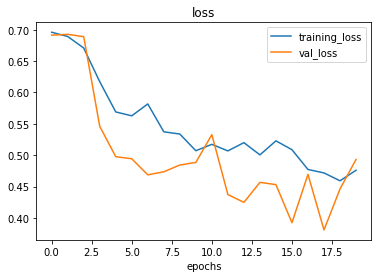

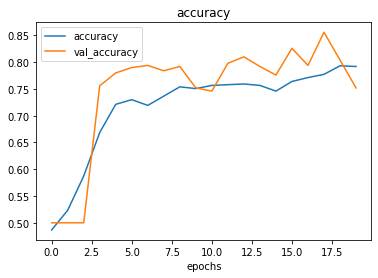

In [62]:
plot_loss_curves(model_9_vgg16.history)


In [64]:
model10_vgg16 = Sequential([
    Conv2D(64,3,input_shape=(224, 224, 3),activation='relu'),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Flatten(),
    Dense(1,activation='sigmoid'),
])

model10_vgg16.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=["accuracy"])

model10_vgg16.fit(
    train_data_augmented_with_shuffle,
    epochs=20,
    steps_per_epoch=len(train_data_augmented_with_shuffle),
    validation_data=test_augmented_with_shuffle,
    validation_steps=len(test_augmented_with_shuffle),
)

Epoch 1/20


2022-07-13 12:48:31.030275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.4900

2022-07-13 12:48:48.751106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 22s 424ms/step - loss: 0.6940 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
47/47 [==============================] - 19s 395ms/step - loss: 0.6926 - accuracy: 0.4900 - val_loss: 0.7039 - val_accuracy: 0.5000
Epoch 3/20
47/47 [==============================] - 19s 391ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/20
47/47 [==============================] - 19s 398ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
47/47 [==============================] - 18s 390ms/step - loss: 0.6932 - accuracy: 0.4827 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
47/47 [==============================] - 18s 390ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
47/47 [==============================] - 18s 390ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/20

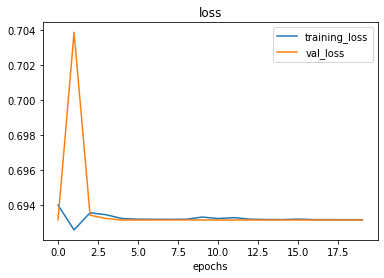

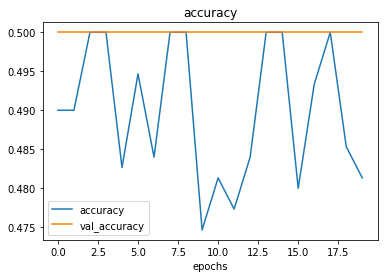

In [66]:
plot_loss_curves(model10_vgg16.history)

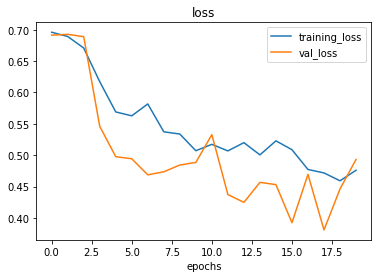

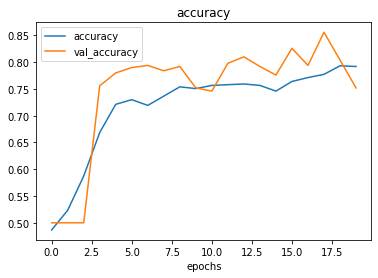

In [67]:
plot_loss_curves(model_9_vgg16.history)

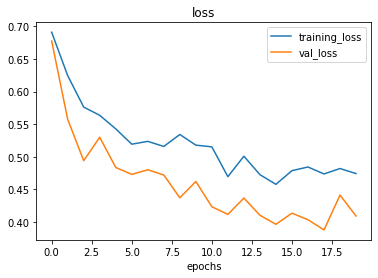

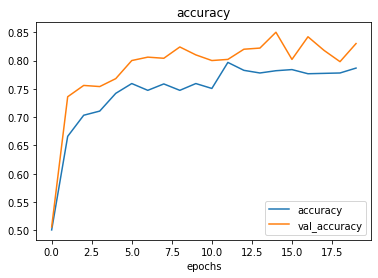

In [68]:
plot_loss_curves(model_8_vgg16.history)


## Seeing that adding more filter will not make our model being good it make the pred and train accuracy lower

In [69]:
print(class_names)

['pizza' 'steak']


# Try to apply our model on practical imgs

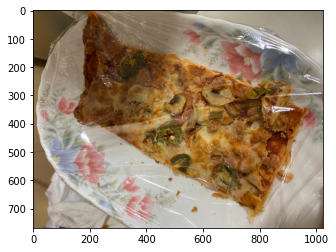

In [74]:
import matplotlib.image as mpimg

img =mpimg.imread('./pizza.jpeg')
plt.imshow(img)

In [76]:
img.shape

(768, 1024, 3)

In [80]:
import tensorflow as tf
expended_pizza = tf.expand_dims(img,axis=0)

In [81]:
model_7_with_shuffle.predict(expended_pizza)

ValueError: in user code:

    File "/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 768, 1024, 3)


## preprocessing with custom data

In [86]:
def load_and_prep_img(filename,img_shape=(224,224)):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    # resize the img
    img= tf.image.resize(img,[img_shape[0], img_shape[1]])
    # rescale the img to normalized
    img = img/255.
    return img 

In [113]:
img = load_and_prep_img(filename='./pizza.jpeg')
img.shape

TensorShape([224, 224, 3])

In [114]:
y_prod = model_7_with_shuffle.predict(tf.expand_dims(img,axis=0))

1/1 [==============================] - 0s 13ms/step


In [115]:
y_prod

array([[0.51193416]], dtype=float32)

In [116]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [117]:
pred_class = class_names[int(tf.round(y_prod))]
pred_class

'steak'

In [100]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-07-13 15:53:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-07-13 15:53:58 (49.2 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



In [110]:
img =load_and_prep_img('./03-pizza-dad.jpeg')

In [111]:
y_prod= model_7_with_shuffle.predict(tf.expand_dims(img,axis=0))
y_prod

1/1 [==============================] - 0s 49ms/step


array([[0.13385119]], dtype=float32)

In [112]:
pred_class = class_names[int(tf.round(y_prod))]
pred_class

'pizza'